# Section

## STEG 1: Download and prep data

In [1]:
import pandas as pd 

In [2]:
df_151715 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2015.xls')
df_151716 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2016.xls')
df_151717 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2017.xls') 
df_151718 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2018.xls')
df_151719 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2019.xls')
df_151720 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2020.xlsx')
df_151721 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2021.xls')

def fix_df1521(df):
    first_col = df.columns[0]
    df = df.set_index(first_col)

    def get_one(keyword):
        hits = df[df.index.str.contains(keyword, case=False, na=False)]
        if len(hits) == 0:
            return None
        return hits.iloc[[0]]  

    rows = [
        get_one('Rån inkl.'),                     
        get_one('Olaga hot'),
        get_one('Misshandel, totalt'),
        get_one('Misshandel inkl. grov'),
        get_one('Skadegörelsebrott'),
        get_one('Sexualbrott'),
        get_one('narkotikastraf'),
    ]

    df_out = pd.concat([r for r in rows if r is not None], axis=0)

    df_out = df_out.reset_index()
    return df_out


df_151715 = fix_df1521(df_151715)
df_151716 = fix_df1521(df_151716)
df_151717 = fix_df1521(df_151717)
df_151718 = fix_df1521(df_151718)
df_151719 = fix_df1521(df_151719)
df_151720 = fix_df1521(df_151720)
df_151721 = fix_df1521(df_151721)

'''Ny datafunktion nedan'''

df_151722 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2022.xlsx')
df_151723 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2023.xlsx')
df_151724 = pd.read_excel('/Users/alvinalindqvist/Desktop/Projekt NY/220La-2024.xlsx')

def fix_df2224(df):
    df.columns = df.iloc[0]
    df = df.iloc[1:].reset_index(drop=True)
    df_robbery = df.loc[df['Brottstyp'] == 'Rån, totalt']
    df_unlawful_threats = df.loc[df['Brottstyp'] == 'Olaga hot, totalt']
    df_physical_abuse = df.loc[df['Brottstyp'] == 'Misshandel, totalt']
    df_physical_abuse_nonfatal = df.loc[df['Brottstyp'] == 'Misshandel, ej med dödlig utgång, totalt']
    df_damage = df.loc[df['Brottstyp'] == 'Skadegörelsebrott, totalt']
    df_sexual_offence = df.loc[df['Brottstyp'] == 'Sexualbrott, totalt']
    df_drugs = df.loc[df['Brottstyp'] == 'Narkotikastrafflagen, totalt']
    df = pd.concat([
        df_robbery,
        df_unlawful_threats,
        df_physical_abuse,
        df_physical_abuse_nonfatal,
        df_damage,
        #df_weapon,
        df_sexual_offence,
        df_drugs
    ], ignore_index=True)    
    return df
    
df_151722 = fix_df2224(df_151722)
df_151723 = fix_df2224(df_151723)
df_151724 = fix_df2224(df_151724)

In [3]:
def clean_simple(df):
    df = df.rename(columns={df.columns[0]: "Brottstyp"})
    
    df = df.iloc[:, :9]

    df.columns = [
        "Brottstyp",
        "Samtliga personer misstänkta för brott",
        "15 år",
        "16 år",
        "17 år",
        "18 år",
        "19 år",
        "20 år",
        "21-24 år"
    ]
    
    return df
    
df_151715 = clean_simple(df_151715) 
df_151716 = clean_simple(df_151716) 
df_151717 = clean_simple(df_151717) 
df_151718 = clean_simple(df_151718) 
df_151719 = clean_simple(df_151719) 
df_151720 = clean_simple(df_151720) 
df_151721 = clean_simple(df_151721) 

In [4]:
df_151724 = df_151724.iloc[:,1:]
df_151723 = df_151723.iloc[:,1:]
df_151722 = df_151722.iloc[:,1:]

df_151724 = clean_simple(df_151724)
df_151723 = clean_simple(df_151723)
df_151722 = clean_simple(df_151722)

In [5]:
def pop_column(df):
    df = df.drop(columns=["Samtliga personer misstänkta för brott"])
    df["Totalt"] = df.iloc[:, 1:].sum(axis=1) 
    return df

df_151715 = pop_column(df_151715)
df_151716 = pop_column(df_151716)
df_151717 = pop_column(df_151717)
df_151718 = pop_column(df_151718)
df_151719 = pop_column(df_151719)
df_151720 = pop_column(df_151720)
df_151721 = pop_column(df_151721)
df_151724 = pop_column(df_151724)
df_151723 = pop_column(df_151723)
df_151722 = pop_column(df_151722)

In [6]:
df_151720

,Brottstyp,15 år,16 år,17 år,18 år,19 år,20 år,21-24 år,Totalt
0,"Rån inkl. grovt (5, 6 §)",374,371.0,260.0,302.0,246.0,235.0,570,2358.0
1,Olaga hot (5 §),733,623.0,484.0,467.0,559.0,580.0,2061,5507.0
2,"Misshandel inkl. grov, ej med dödlig utgång (5...",1622,1274.0,1034.0,1189.0,1185.0,1185.0,4015,11504.0
3,12 kap. Skadegörelsebrott,591,489.0,389.0,418.0,415.0,423.0,1279,4004.0
4,6 kap. Sexualbrott,383,315.0,307.0,286.0,323.0,363.0,1092,3069.0
5,Brott mot narkotikastrafflagen,1285,1773.0,2161.0,3026.0,3422.0,3544.0,10901,26112.0


## STEG 2: Skapa tidsserien X(t) för varje brottstyp. Ungdomsbrott (indikatorer)

In [7]:
years = list(range(2015,2025))

df_x = pd.DataFrame(index=years)
data = {
    'Rån': [1419, 1607, 1518, 1872, 1909, 2358, 1897, 1537, 1648, 1485],
    'Olaga hot': [5121, 5488, 5176, 5196, 5325, 5507, 4892, 4582, 4589, 4777],
    'Misshandel': [12091, 12280, 11541, 11076, 11081, 11504, 10096, 9833, 10247, 10868],
    'Skadegörelsebrott': [4458, 4550, 4626, 4003, 3719, 4004, 3473, 2960, 2859, 2754],
    'Sexualbrott': [1955, 2256, 2610, 2744, 2899, 3069, 3268, 2957, 2989, 3116],
    'Narkotikastrafflagen': [19554, 19173, 21635, 23623, 25217, 26112, 24918, 24782, 24640, 24016]
}

df_x = pd.DataFrame(data, index=years)
df_x

,Rån,Olaga hot,Misshandel,Skadegörelsebrott,Sexualbrott,Narkotikastrafflagen
2015,1419,5121,12091,4458,1955,19554
2016,1607,5488,12280,4550,2256,19173
2017,1518,5176,11541,4626,2610,21635
2018,1872,5196,11076,4003,2744,23623
2019,1909,5325,11081,3719,2899,25217
2020,2358,5507,11504,4004,3069,26112
2021,1897,4892,10096,3473,3268,24918
2022,1537,4582,9833,2960,2957,24782
2023,1648,4589,10247,2859,2989,24640
2024,1485,4777,10868,2754,3116,24016


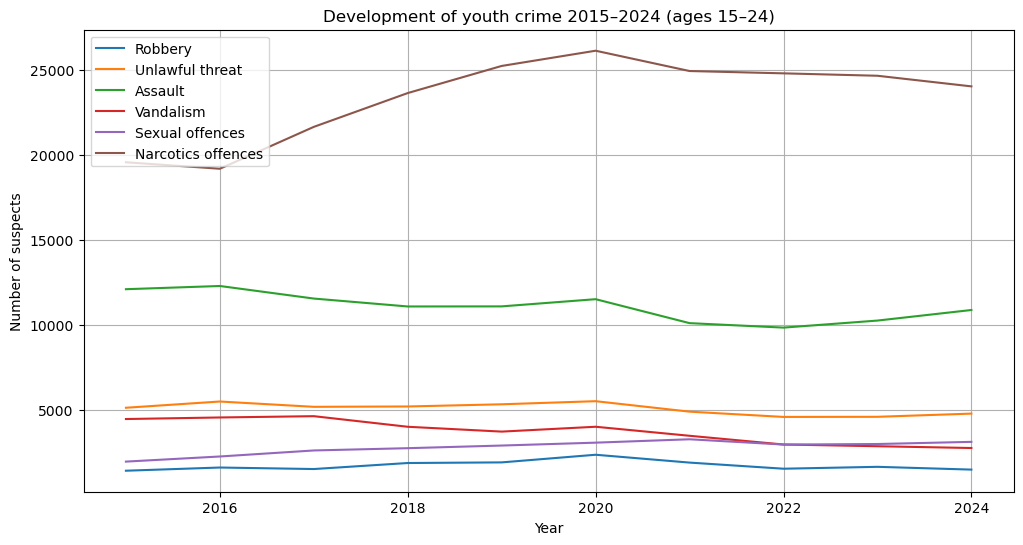

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df_x.index, df_x["Rån"], label="Robbery")
plt.plot(df_x.index, df_x["Olaga hot"], label="Unlawful threat")
plt.plot(df_x.index, df_x["Misshandel"], label="Assault")
plt.plot(df_x.index, df_x["Skadegörelsebrott"], label="Vandalism")
plt.plot(df_x.index, df_x["Sexualbrott"], label="Sexual offences")
plt.plot(df_x.index, df_x["Narkotikastrafflagen"], label="Narcotics offences")

plt.title("Development of youth crime 2015–2024 (ages 15–24)")
plt.xlabel("Year")
plt.ylabel("Number of suspects")
plt.legend()
plt.grid(True)
plt.show()

## STEG 3: Skapa Y(t) = GROVT VÅLD-tidsserien

In [11]:
years = list(range(2015,2025)) 

df_y1 = pd.DataFrame(index=years)

data = {
    'Mord/Dråp': [276,325,315,358,399,391,361,373,471,473],
    'Försök till mord/dråp': [610,696,726,705,820,925,949,996,1278,1468]
}

df_y1 = pd.DataFrame(data, index=years)
df_y1 = df_y1.loc[2018:]
df_y1

,Mord/Dråp,Försök till mord/dråp
2018,358,705
2019,399,820
2020,391,925
2021,361,949
2022,373,996
2023,471,1278
2024,473,1468


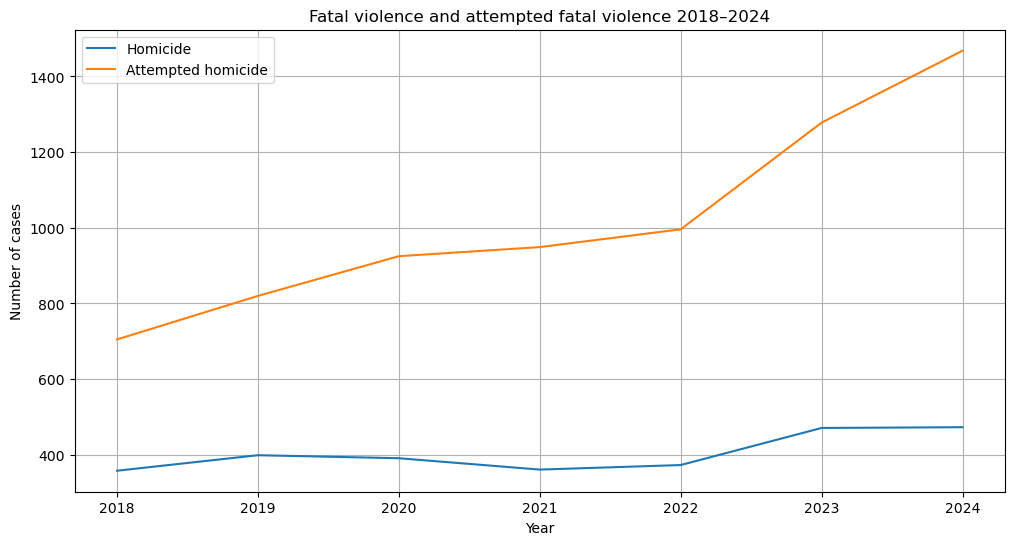

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df_y1.index, df_y1["Mord/Dråp"], label="Homicide")
plt.plot(df_y1.index, df_y1["Försök till mord/dråp"], label="Attempted homicide")

plt.title("Fatal violence and attempted fatal violence 2018–2024")
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
years = list(range(2018,2025)) 

df_y2 = pd.DataFrame(index=years)

data = {
    'Sprängningar': [90,133,107,79,90,159,136],
    'Skjutningar': [325,360,379,344,391,368,296],
}

df_y2 = pd.DataFrame(data, index=years)
df_y2

,Sprängningar,Skjutningar
2018,90,325
2019,133,360
2020,107,379
2021,79,344
2022,90,391
2023,159,368
2024,136,296


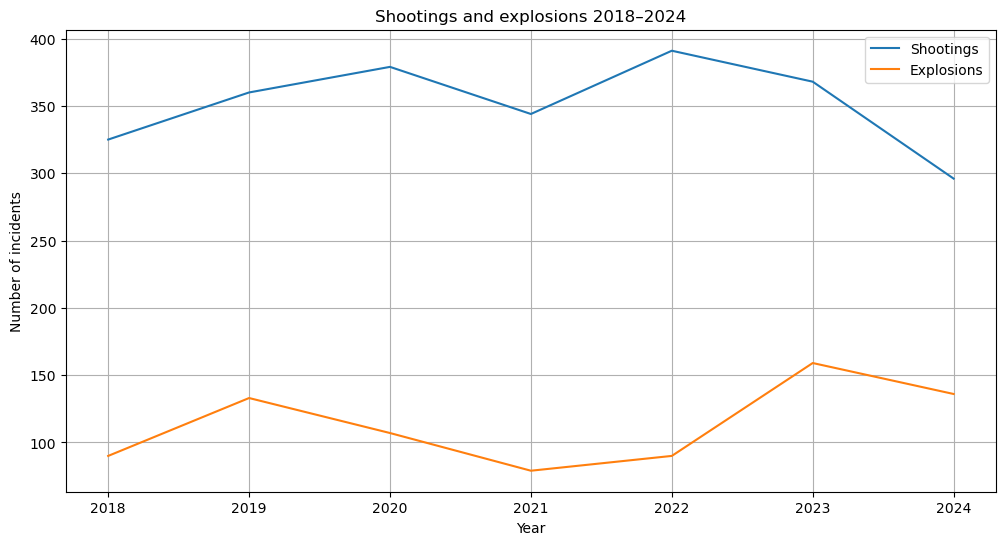

In [21]:
plt.figure(figsize=(12,6))

plt.plot(df_y2.index, df_y2["Skjutningar"], label="Shootings")
plt.plot(df_y2.index, df_y2["Sprängningar"], label="Explosions")

plt.title("Shootings and explosions 2018–2024")
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.legend()
plt.grid(True)
plt.show()